# MATH475 Final
## Daniel Aoulou
For this project, I will use the Drug Consumption (Quantified) dataset from the UCI Machine Learning Repository to predict if a person is likely to frequently use a given drug based on personality traits like extroversion, impulsivity, and neuroticism, as well as demographic factors like age and gender. I plan to use classification models, such as Logistic Regression and Random Forests. The goal is to try to predict frequent drug use likelihood based on these traits. Here is the link to the dataset: [Drug Consumption (Quantified) dataset from UCI MLR](https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29).

## Data Exploration

In [142]:
import pandas as pd

# Load the dataset
file_path = 'drug_consumption.data'

#define columns from the documentation
columns = [
    'ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
    'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',
    'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis',
    'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',
    'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA'
]

# Load data into a DataFrame
data = pd.read_csv(file_path, header=None, names=columns)

# Semer is a fictitious drug the researches introduced to identify over-claimers, we can drop these rows.
# CL0 siginifies no usage ever; any other result signifies some usage.
data = data.drop(data[data['Semer'] != 'CL0'].index)

# Then drop unnecesary columns (Chocolate and Semer)
data = data.drop(['ID', 'Choc','Semer'], axis=1)
columns = data.columns

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

print(f'Original shape of data with {data.shape[0]} rows and {data.shape[1]} columns')
print(f'Missing value count: {data.isna().sum().sum()}')
data_info, data_head

<class 'pandas.core.frame.DataFrame'>
Index: 1877 entries, 0 to 1884
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1877 non-null   float64
 1   Gender     1877 non-null   float64
 2   Education  1877 non-null   float64
 3   Country    1877 non-null   float64
 4   Ethnicity  1877 non-null   float64
 5   Nscore     1877 non-null   float64
 6   Escore     1877 non-null   float64
 7   Oscore     1877 non-null   float64
 8   Ascore     1877 non-null   float64
 9   Cscore     1877 non-null   float64
 10  Impulsive  1877 non-null   float64
 11  SS         1877 non-null   float64
 12  Alcohol    1877 non-null   object 
 13  Amphet     1877 non-null   object 
 14  Amyl       1877 non-null   object 
 15  Benzos     1877 non-null   object 
 16  Caffeine   1877 non-null   object 
 17  Cannabis   1877 non-null   object 
 18  Coke       1877 non-null   object 
 19  Crack      1877 non-null   object 
 20  Ecstasy    18

(None,
        Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
 0  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
 1 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
 2  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
 3 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
 4  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   
 
     Ascore   Cscore  ...  Crack  Ecstasy Heroin Ketamine Legalh  LSD Meth  \
 0 -0.91699 -0.00665  ...    CL0      CL0    CL0      CL0    CL0  CL0  CL0   
 1  0.76096 -0.14277  ...    CL0      CL4    CL0      CL2    CL0  CL2  CL3   
 2 -1.62090 -1.01450  ...    CL0      CL0    CL0      CL0    CL0  CL0  CL0   
 3  0.59042  0.58489  ...    CL0      CL0    CL0      CL2    CL0  CL0  CL0   
 4 -0.30172  1.30612  ...    CL0      CL1    CL0      CL0    CL1  CL0  CL0   
 
   Mushrooms Nicotine  VSA  


We start by listing our columns and some rows to get an idea about the structure of our data set. Each row represents an individual, their personality trait scores, and their most recent usage for each drug listed, with CL0 representing no prior usage for a drug, up to CL6 representing usage within the last day.

Notice that values like age and gender are already encoded rather than being raw values. There are also no missing values. This will allow us to focus on data manipulation and model training.

Next we'll plot each of the features to gain an understanding of the distribution of the data set. Let's also further modify the data set. I want to try to predict regular drug use, so for my purposes I will define a positive representation as someone who has used a drug within the last month.

Index(['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Coke',
       'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
       'Mushrooms', 'Nicotine', 'VSA'],
      dtype='object')


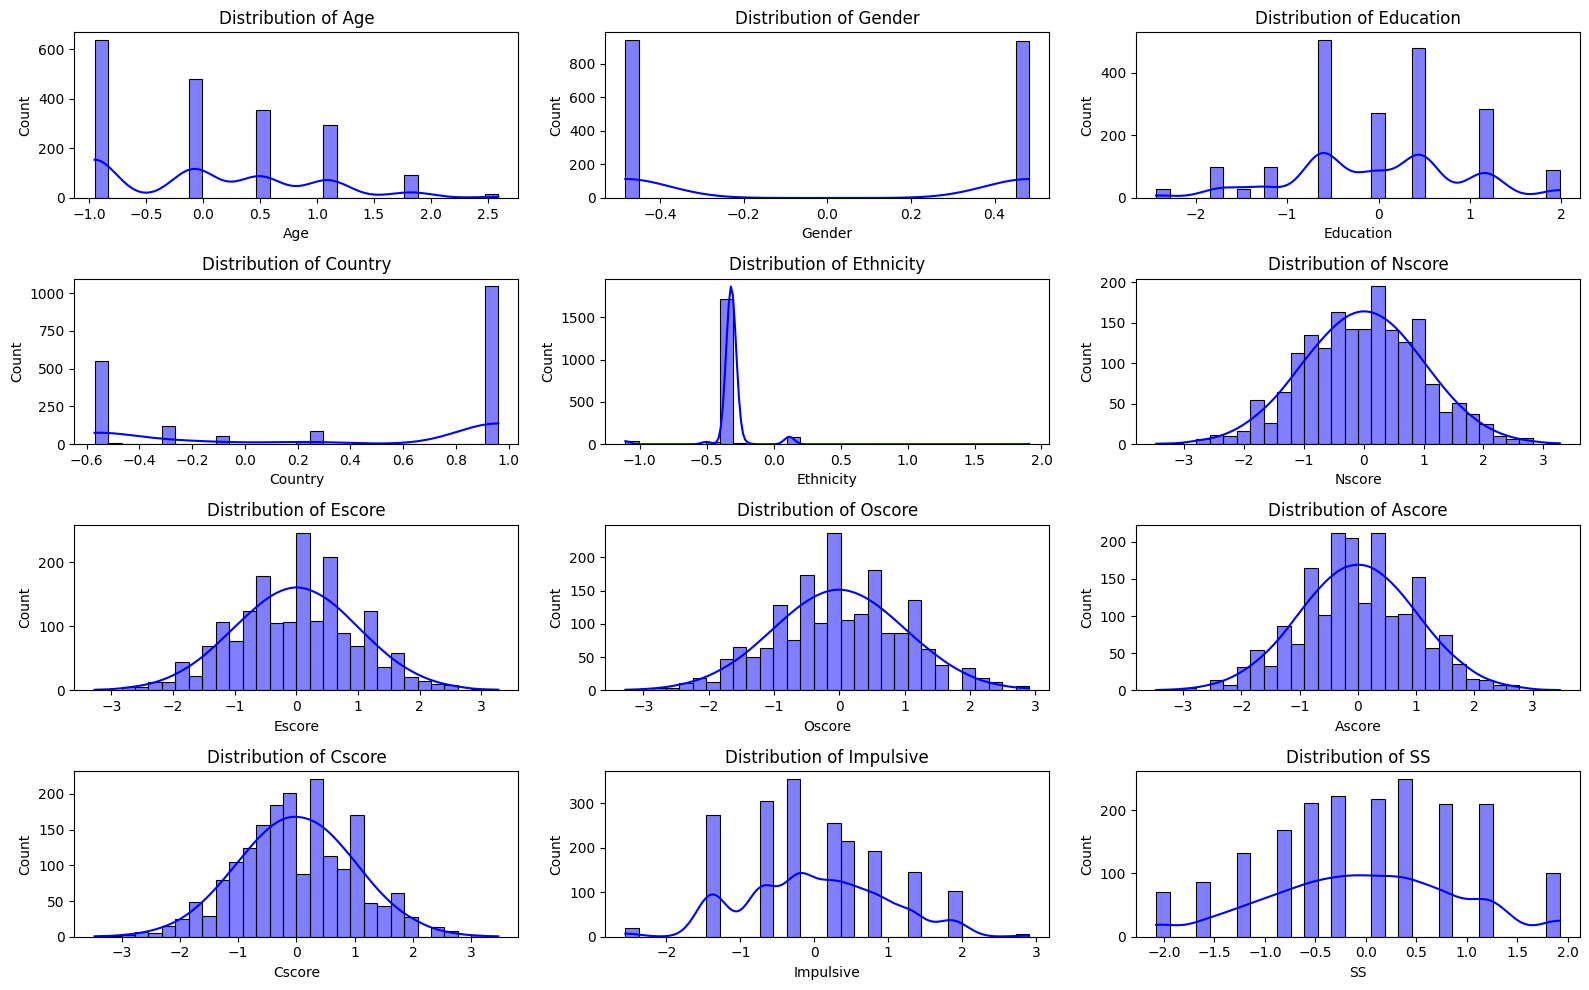

Coke distribution:
 Coke
0    0.916356
1    0.083644


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,0.037577,-0.000771,-0.000984,0.358984,-0.309728,-0.000551,-0.001951,-0.003224,-0.000657,-0.000394,0.005293,-0.007408
std,0.878387,0.482588,0.949831,0.699707,0.166220,0.998442,0.997418,0.995691,0.996689,0.997657,0.954148,0.962074
min,-0.951970,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.951970,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.078540,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.497880,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.591710,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

drug_columns = columns[12:]  # Drug-related columns
selected_features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity',
                      'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
print(drug_columns)

# Convert categorical drug usage columns to binary (CL0 = no use, CL4 = use in the last month)
for col in drug_columns:
    data[col] = data[col].apply(lambda x: 0 if x in ['CL0', 'CL1', 'CL2', 'CL3'] else 1)

# Descriptive statistics for numerical features
numerical_stats = data[selected_features].describe()

# Check class distribution for one example drug, choosing cocaine
coke_distribution = data['Coke'].value_counts(normalize=True)

# Plot distributions of selected numerical features
plt.figure(figsize=(16, 10))
for i, feature in enumerate(selected_features[:12], 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Display results of the statistical summary and coke distribution as an example
print("Coke distribution:\n " + coke_distribution.to_string())
numerical_stats

A majority of the participants are from the UK and the USA, and the dataset consists of a majority of white participants. Most of the participants are between 18 and 34. Most of the participants have completed at least some university and at most obtained a university degree (not master's or graduate).

The rest of the features, the personality traits, the distributions are all normally distributed, which is a good sign. Extensive data manipulation is probably not required, and the main challenge will be with evaluating which features are best suited for traininig the model.

92% of participants in the database reported infrequent cocaine usage, while 8% reported at least some in the last month.

Next, let's look at correlation values.

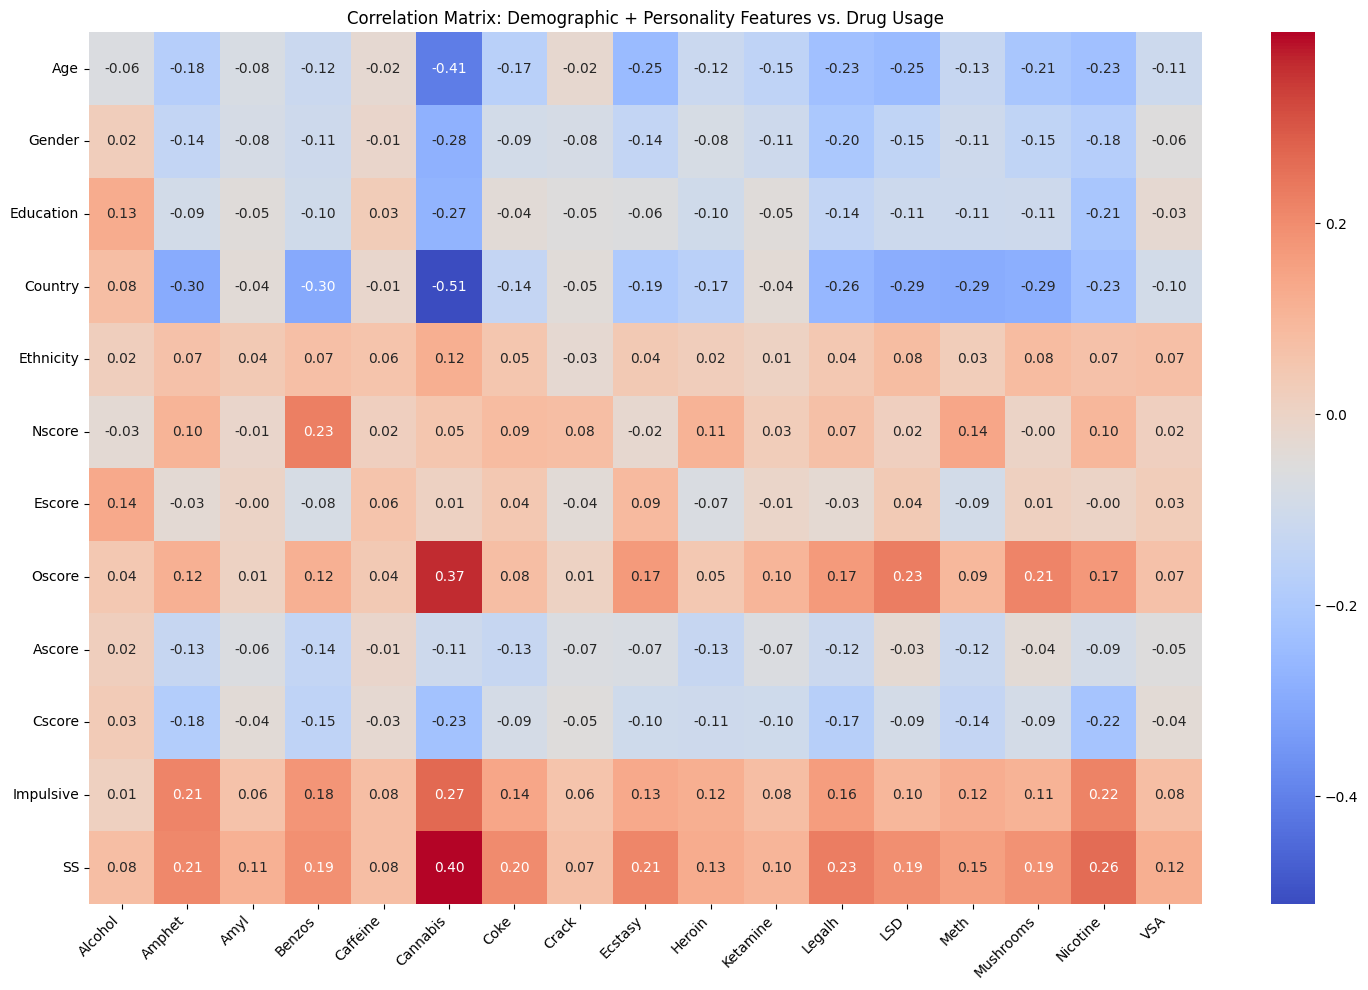

In [144]:
# Correlation analysis for numerical features with all drug targets
corr_drug_columns = [col for col in data.columns if col not in selected_features + ['ID']]
correlation_matrix_all = data[selected_features + corr_drug_columns].corr()

# Extract correlations of numerical features with all drug columns
drug_correlations = correlation_matrix_all.loc[selected_features, corr_drug_columns]

# Plot heatmap of correlations for all drugs
plt.figure(figsize=(15, 10))
sns.heatmap(drug_correlations, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix: Demographic + Personality Features vs. Drug Usage")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


The heatmap shows some interesting information as to what features seem to affect drug usage. For example, SS (sensation seeking) has strong positive correlations with a high number of drugs, indicating that the more a person. seeks new sensations the more likely they are to try drugs like legal highs or Mushrooms. Escore (Extraversion) has correlation values close to 0 across the board, indicating little linear relationships with most drugs.

Age has strong negative correlations with Cannabis, Ecstacy, and LSD, indicating that they are more likely to be frequently used by younger people.

Lastly, let's check for outliers in the numerical features and remove them:

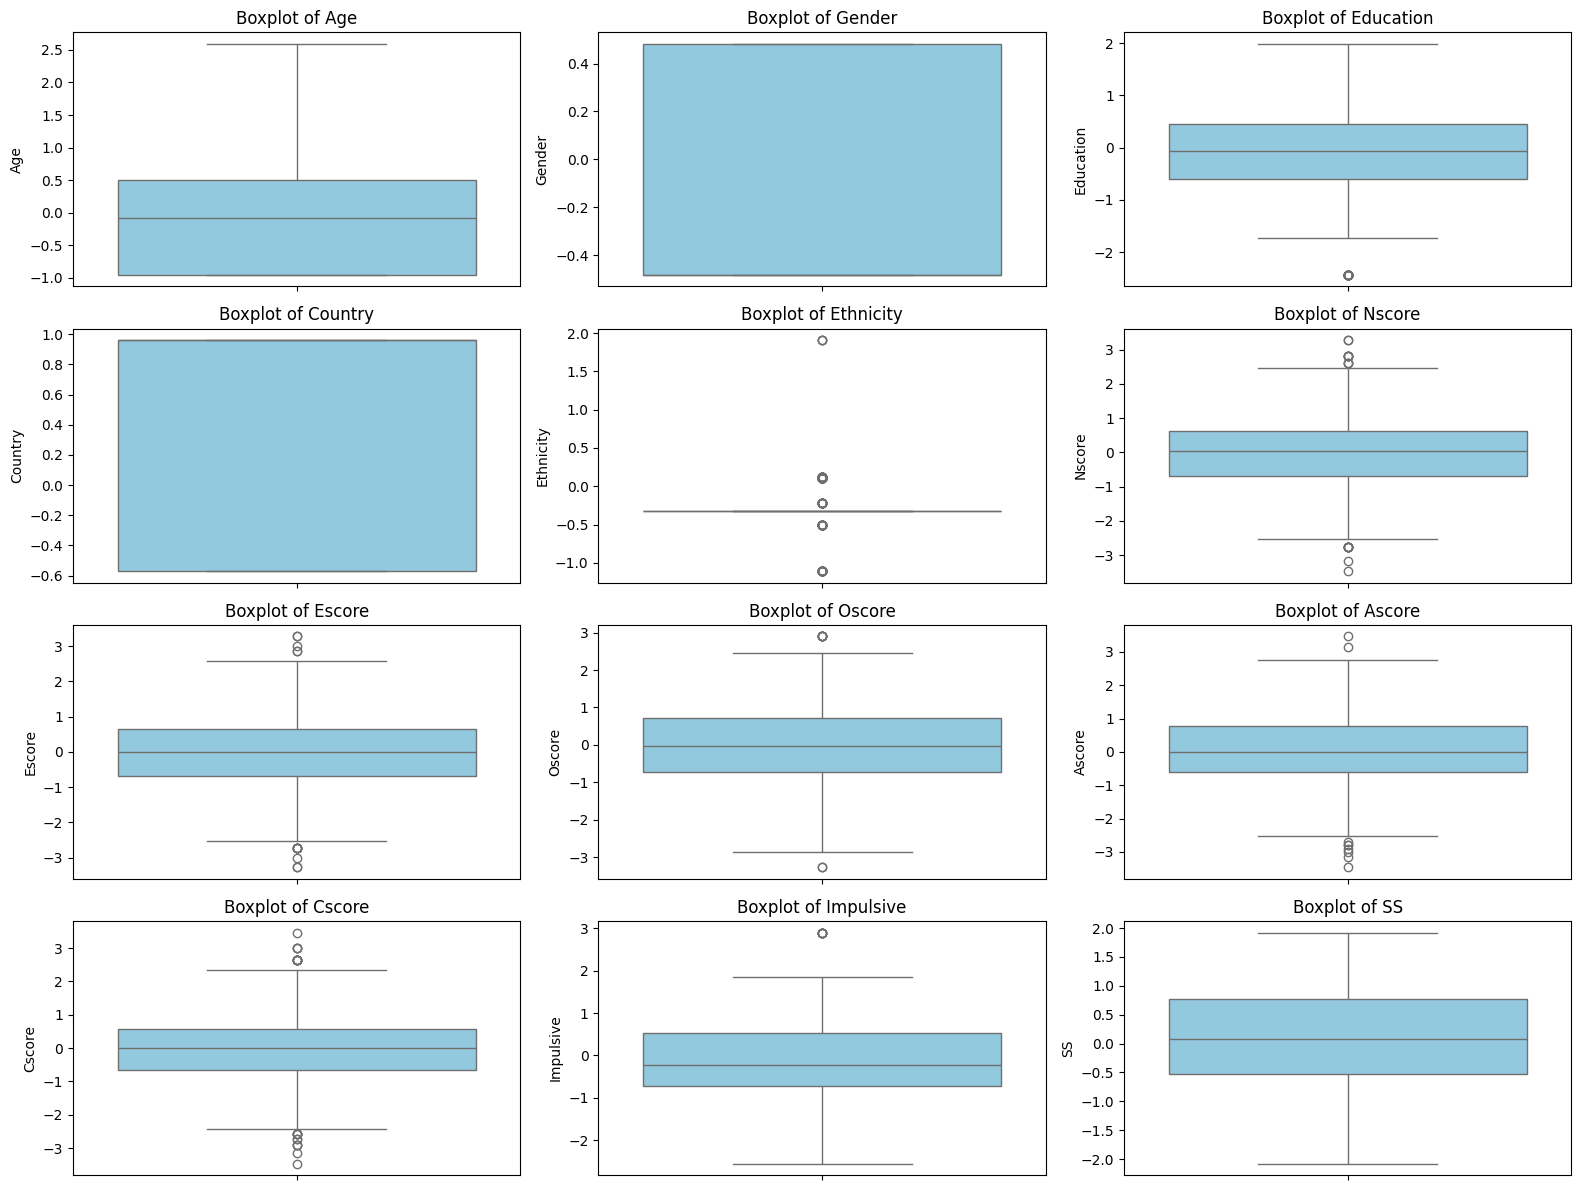

{'Age': 0,
 'Gender': 0,
 'Education': 28,
 'Country': 0,
 'Ethnicity': 162,
 'Nscore': 19,
 'Escore': 14,
 'Oscore': 9,
 'Ascore': 9,
 'Cscore': 24,
 'Impulsive': 7,
 'SS': 0}

In [145]:
# Check for outliers in numerical features using boxplots
plt.figure(figsize=(16, 12))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

# Calculate IQR and identify potential outliers for each feature
outliers = {}
for feature in selected_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[feature] = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)][feature]

outliers_summary = {k: len(v) for k, v in outliers.items()}
outliers_summary

The features "Education" and "Ethnicity" show the highest number of outliers. This could be due to their encoding or data representation.

Personality traits such as "Nscore" and "Escore" also show some extreme values, likely representing individuals at the extremes of these traits.

In [146]:
# Remove outliers from the dataset
data_cleaned = data.copy()

for feature in selected_features:
    Q1 = data_cleaned[feature].quantile(0.25)
    Q3 = data_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out rows with outliers in the current feature
    data_cleaned = data_cleaned[(data_cleaned[feature] >= lower_bound) & (data_cleaned[feature] <= upper_bound)]

# Check the size of the cleaned dataset
cleaned_size = data_cleaned.shape
original_size = data.shape

cleaned_size, original_size


((1610, 29), (1877, 29))

The dataset size after removing outliers is as follows:

- Original Size: 1877 rows
- Cleaned Size: 1610 rows

## Model Selection and Training

Now, we will select and train two different models. We'll use LogisticRegression and RandomForest to test their accuracy in prediciting drug usage based on the numerical values in the data set (demographic + personality trait data). We'll test across all drugs. The goal is to see if the model can effectively predict someone's potential for usage for a certain drug based on their personality traits and demographics, so we'll use those as our independent values.

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

def logistic_regression_analysis(data, target_drug, selected_features):
    """
    Analyze drug usage for a specified target drug using Logistic Regression.
    """
    # Ensure the target drug exists in the dataset
    if target_drug not in data.columns:
        raise ValueError(f"The target drug '{target_drug}' is not in the dataset.")

    # Define features (X) and target (y)
    X = data[selected_features]
    y = data[target_drug]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Logistic Regression
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train_scaled, y_train)
    y_pred_lr = lr_model.predict(X_test_scaled)

    # Evaluation
    lr_accuracy = accuracy_score(y_test, y_pred_lr)
    lr_f1 = f1_score(y_test, y_pred_lr)

    # Print results
    print(f"Logistic Regression Results for Target Drug: {target_drug}")
    print(f"Accuracy: {lr_accuracy:.2f}, F1-Score: {lr_f1:.2f}\n")

    return {'Accuracy': lr_accuracy, 'F1-Score': lr_f1}


def random_forest_analysis(data, target_drug, selected_features):
    """
    Analyze drug usage for a specified target drug using Random Forest.
    """
    # Ensure the target drug exists in the dataset
    if target_drug not in data.columns:
        raise ValueError(f"The target drug '{target_drug}' is not in the dataset.")

    # Define features (X) and target (y)
    X = data[selected_features]
    y = data[target_drug]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    # Evaluation
    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    rf_f1 = f1_score(y_test, y_pred_rf)

    # Print results
    print(f"Random Forest Results for Target Drug: {target_drug}")
    print(f"Accuracy: {rf_accuracy:.2f}, F1-Score: {rf_f1:.2f}\n")

    return {'Accuracy': rf_accuracy, 'F1-Score': rf_f1}

results_logistic = {}
results_rf = {}

# Test the models for all drugs in the dataset
for drug in drug_columns:
    print(f"Analyzing {drug}...\n")
    results_logistic[drug] = logistic_regression_analysis(data_cleaned, target_drug=drug, selected_features=selected_features)
    results_rf[drug] = random_forest_analysis(data_cleaned, target_drug=drug, selected_features=selected_features)

Analyzing Alcohol...

Logistic Regression Results for Target Drug: Alcohol
Accuracy: 0.80, F1-Score: 0.89

Random Forest Results for Target Drug: Alcohol
Accuracy: 0.80, F1-Score: 0.89

Analyzing Amphet...

Logistic Regression Results for Target Drug: Amphet
Accuracy: 0.90, F1-Score: 0.11

Random Forest Results for Target Drug: Amphet
Accuracy: 0.90, F1-Score: 0.11

Analyzing Amyl...

Logistic Regression Results for Target Drug: Amyl
Accuracy: 0.98, F1-Score: 0.00

Random Forest Results for Target Drug: Amyl
Accuracy: 0.98, F1-Score: 0.00

Analyzing Benzos...

Logistic Regression Results for Target Drug: Benzos
Accuracy: 0.88, F1-Score: 0.13

Random Forest Results for Target Drug: Benzos
Accuracy: 0.87, F1-Score: 0.09

Analyzing Caffeine...

Logistic Regression Results for Target Drug: Caffeine
Accuracy: 0.96, F1-Score: 0.98

Random Forest Results for Target Drug: Caffeine
Accuracy: 0.96, F1-Score: 0.98

Analyzing Cannabis...

Logistic Regression Results for Target Drug: Cannabis
Accur

Notice that the models do great in prediciting a few drug usages, like Alcohol and Caffeine, and worse for others like VSA.

Let's find out what drugs the models are struggling with by filtering them at an F-Score threshold of 0.75:

In [148]:
def evaluate_model_performance(results, threshold=0.75):
    """
    Evaluate model performance for each drug and classify them as well-predicted or poorly-predicted.

    Parameters:
    - results (dict): Dictionary of drug prediction results with F1-scores and accuracies.
    - threshold (float): Minimum F1-score to consider a drug as well-predicted.

    Returns:
    - good_predictions (dict): Drugs with F1-scores above the threshold.
    - poor_predictions (dict): Drugs with F1-scores below the threshold.
    """
    good_predictions = {}
    poor_predictions = {}

    for drug, metrics in results.items():
        if metrics['F1-Score'] >= threshold:
            good_predictions[drug] = metrics
        else:
            poor_predictions[drug] = metrics

    return good_predictions, poor_predictions


# Evaluate Logistic Regression results
logistic_good, logistic_poor = evaluate_model_performance(results_logistic, threshold=0.75)

# Evaluate Random Forest results
rf_good, rf_poor = evaluate_model_performance(results_rf, threshold=0.75)

# Display results
print("Logistic Regression: Good Predictions")
for drug, metrics in logistic_good.items():
    print(f"{drug}: Accuracy = {metrics['Accuracy']:.2f}, F1-Score = {metrics['F1-Score']:.2f}")

print("\nLogistic Regression: Poor Predictions")
for drug, metrics in logistic_poor.items():
    print(f"{drug}: Accuracy = {metrics['Accuracy']:.2f}, F1-Score = {metrics['F1-Score']:.2f}")

print("\nRandom Forest: Good Predictions")
for drug, metrics in rf_good.items():
    print(f"{drug}: Accuracy = {metrics['Accuracy']:.2f}, F1-Score = {metrics['F1-Score']:.2f}")

print("\nRandom Forest: Poor Predictions")
for drug, metrics in rf_poor.items():
    print(f"{drug}: Accuracy = {metrics['Accuracy']:.2f}, F1-Score = {metrics['F1-Score']:.2f}")

Logistic Regression: Good Predictions
Alcohol: Accuracy = 0.80, F1-Score = 0.89
Caffeine: Accuracy = 0.96, F1-Score = 0.98

Logistic Regression: Poor Predictions
Amphet: Accuracy = 0.90, F1-Score = 0.11
Amyl: Accuracy = 0.98, F1-Score = 0.00
Benzos: Accuracy = 0.88, F1-Score = 0.13
Cannabis: Accuracy = 0.77, F1-Score = 0.69
Coke: Accuracy = 0.91, F1-Score = 0.00
Crack: Accuracy = 0.99, F1-Score = 0.00
Ecstasy: Accuracy = 0.90, F1-Score = 0.06
Heroin: Accuracy = 0.98, F1-Score = 0.00
Ketamine: Accuracy = 0.98, F1-Score = 0.00
Legalh: Accuracy = 0.89, F1-Score = 0.05
LSD: Accuracy = 0.92, F1-Score = 0.07
Meth: Accuracy = 0.94, F1-Score = 0.00
Mushrooms: Accuracy = 0.91, F1-Score = 0.00
Nicotine: Accuracy = 0.65, F1-Score = 0.61
VSA: Accuracy = 0.99, F1-Score = 0.00

Random Forest: Good Predictions
Alcohol: Accuracy = 0.80, F1-Score = 0.89
Caffeine: Accuracy = 0.96, F1-Score = 0.98

Random Forest: Poor Predictions
Amphet: Accuracy = 0.90, F1-Score = 0.11
Amyl: Accuracy = 0.98, F1-Score = 

The models performed pretty poorly in general; F-Scores were drastically low for all drugs but Alcohol and Caffeine. Accuracy remained high for many drugs, suggesting that the model the model is overly focused on the majority class and failing to capture patterns in the minority class.

### Gradient Boosting Models
After some research, I learned about Gradient Boosting models and decided to use the XGBClassifier. Gradient Boosting models offer a good balance between performance and scalability while handling the dataset's complexity and potential class imbalance issues. Here, I implement and evaluate the XGBClassifier.

In [149]:
from sklearn.metrics import accuracy_score, f1_score

def gradient_boosting_analysis_and_evaluation(data, target_drug, selected_features, threshold=0.75):
    """
    Analyze drug usage for a specified target drug using a Gradient Boosting model (XGBoost),
    and classify the prediction as good or poor based on F1-score.

    Parameters:
    - data (pd.DataFrame): The dataset containing drug usage and features.
    - target_drug (str): The column name of the target drug to predict.
    - selected_features (list): List of feature column names to include.
    - threshold (float): Minimum F1-score to consider a drug as well-predicted (default is 0.75).

    Returns:
    - dict: A dictionary containing the drug, accuracy, F1-score, and classification (good or poor).
    """
    # Ensure the target drug exists in the dataset
    if target_drug not in data.columns:
        raise ValueError(f"The target drug '{target_drug}' is not in the dataset.")

    # Define features (X) and target (y)
    X = data[selected_features]
    y = data[target_drug]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Gradient Boosting (XGBoost) Model
    gb_model = XGBClassifier(random_state=42, eval_metric='logloss')
    gb_model.fit(X_train_scaled, y_train)
    y_pred_gb = gb_model.predict(X_test_scaled)

    # Evaluation
    gb_accuracy = accuracy_score(y_test, y_pred_gb)
    gb_f1 = f1_score(y_test, y_pred_gb)

    # Classify predictions as good or poor
    prediction_class = 'Good' if gb_f1 >= threshold else 'Poor'

    # Print results
    # print(f"Gradient Boosting Results for Target Drug: {target_drug}")
    # print(f"Accuracy: {gb_accuracy:.2f}, F1-Score: {gb_f1:.2f}, Prediction: {prediction_class}\n")

    return {
        'Drug': target_drug,
        'Accuracy': gb_accuracy,
        'F1-Score': gb_f1,
        'Prediction': prediction_class
    }


# Example usage
selected_features = [
    'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
    'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'
]

# Test the model for all drugs in the dataset and classify as good or poor predictions
results_gb_classified = {}

for drug in drug_columns:
    results_gb_classified[drug] = gradient_boosting_analysis_and_evaluation(
        data_cleaned, target_drug=drug, selected_features=selected_features
    )

# Separate good and poor predictions
good_predictions = {drug: result for drug, result in results_gb_classified.items() if result['Prediction'] == 'Good'}
poor_predictions = {drug: result for drug, result in results_gb_classified.items() if result['Prediction'] == 'Poor'}

# Display good and poor predictions
print("Gradient Boosting: Good Predictions")
for drug, metrics in good_predictions.items():
    print(f"{drug}: Accuracy = {metrics['Accuracy']:.2f}, F1-Score = {metrics['F1-Score']:.2f}")

print("\nGradient Boosting: Poor Predictions")
for drug, metrics in poor_predictions.items():
    print(f"{drug}: Accuracy = {metrics['Accuracy']:.2f}, F1-Score = {metrics['F1-Score']:.2f}")


# Aggregate overall metrics
def evaluate_overall_performance(results):
    """
    Evaluate overall performance metrics across all drugs.

    Parameters:
    - results (dict): A dictionary with performance metrics for each drug.

    Returns:
    - dict: Overall performance metrics (average accuracy, F1-score, percentage of good predictions).
    """
    total_drugs = len(results)
    total_good_predictions = sum(1 for result in results.values() if result['Prediction'] == 'Good')
    avg_accuracy = sum(result['Accuracy'] for result in results.values()) / total_drugs
    avg_f1_score = sum(result['F1-Score'] for result in results.values()) / total_drugs
    percentage_good = (total_good_predictions / total_drugs) * 100

    return {
        'Average Accuracy': avg_accuracy,
        'Average F1-Score': avg_f1_score,
        'Percentage Good Predictions': percentage_good
    }

# Evaluate overall performance
overall_performance = evaluate_overall_performance(results_gb_classified)

# Display overall performance metrics
print("\nOverall Performance:")
print(f"Average Accuracy: {overall_performance['Average Accuracy']:.2f}")
print(f"Average F1-Score: {overall_performance['Average F1-Score']:.2f}")
print(f"Percentage Good Predictions: {overall_performance['Percentage Good Predictions']:.2f}%")



Gradient Boosting: Good Predictions
Alcohol: Accuracy = 0.79, F1-Score = 0.88
Caffeine: Accuracy = 0.96, F1-Score = 0.98

Gradient Boosting: Poor Predictions
Amphet: Accuracy = 0.90, F1-Score = 0.33
Amyl: Accuracy = 0.98, F1-Score = 0.00
Benzos: Accuracy = 0.87, F1-Score = 0.25
Cannabis: Accuracy = 0.77, F1-Score = 0.71
Coke: Accuracy = 0.90, F1-Score = 0.06
Crack: Accuracy = 0.99, F1-Score = 0.00
Ecstasy: Accuracy = 0.84, F1-Score = 0.11
Heroin: Accuracy = 0.98, F1-Score = 0.00
Ketamine: Accuracy = 0.97, F1-Score = 0.00
Legalh: Accuracy = 0.88, F1-Score = 0.26
LSD: Accuracy = 0.92, F1-Score = 0.13
Meth: Accuracy = 0.93, F1-Score = 0.08
Mushrooms: Accuracy = 0.91, F1-Score = 0.25
Nicotine: Accuracy = 0.61, F1-Score = 0.56
VSA: Accuracy = 0.99, F1-Score = 0.00

Overall Performance:
Average Accuracy: 0.89
Average F1-Score: 0.27
Percentage Good Predictions: 11.76%


The model once again performed well on drugs like alcohol and caffeine, and in general performed better than logistic regression and random forest, but still struggled with the majority of drugs, so at this point I decided to take another look at the data set.

I checked the class distributions for each drug:

In [150]:
for drug in drug_columns:
    print(data_cleaned[drug].value_counts(normalize=True))
    print()


Alcohol
1    0.831677
0    0.168323
Name: proportion, dtype: float64

Amphet
0    0.880124
1    0.119876
Name: proportion, dtype: float64

Amyl
0    0.980124
1    0.019876
Name: proportion, dtype: float64

Benzos
0    0.848447
1    0.151553
Name: proportion, dtype: float64

Caffeine
1    0.940994
0    0.059006
Name: proportion, dtype: float64

Cannabis
0    0.593789
1    0.406211
Name: proportion, dtype: float64

Coke
0    0.925466
1    0.074534
Name: proportion, dtype: float64

Crack
0    0.990062
1    0.009938
Name: proportion, dtype: float64

Ecstasy
0    0.871429
1    0.128571
Name: proportion, dtype: float64

Heroin
0    0.975155
1    0.024845
Name: proportion, dtype: float64

Ketamine
0    0.958385
1    0.041615
Name: proportion, dtype: float64

Legalh
0    0.875776
1    0.124224
Name: proportion, dtype: float64

LSD
0    0.915528
1    0.084472
Name: proportion, dtype: float64

Meth
0    0.914286
1    0.085714
Name: proportion, dtype: float64

Mushrooms
0    0.920497
1    0.07950

I found that there were lots of drugs that were highly unbalanced. This simply means that, for a drug like Meth, there is less positive representation for the model to be trained with. The classes with high positive representation (like alcohol and caffeine, which everyone uses) were also the ones with high F-scores and higher accuracy.

I implemented the scale_pos_weight paramater for the XGBClassifier to try and balance the data set:

In [151]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

def balance_class_weights_and_train(data, drug_columns, selected_features):
    """
    Train a Gradient Boosting model with dynamically balanced class weights
    for each drug and evaluate performance.

    Parameters:
    - data: pd.DataFrame, the dataset
    - drug_columns: list, list of drug columns
    - selected_features: list, feature column names for the model

    Returns:
    - results: dict, a dictionary with evaluation metrics for each drug
    """
    results = {}

    for drug in drug_columns:

        # Define features (X) and target (y)
        X = data[selected_features]
        y = data[drug]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Calculate class imbalance ratio
        total_negatives = len(y_train[y_train == 0])
        total_positives = len(y_train[y_train == 1])
        scale_pos_weight = total_negatives / total_positives if total_positives > 0 else 1

        # Train XGBoost with adjusted class weights
        gb_model_weighted = XGBClassifier(
            random_state=42,
            eval_metric='logloss',
            scale_pos_weight=scale_pos_weight
        )

        gb_model_weighted.fit(X_train_scaled, y_train)

        # Predict and evaluate
        y_pred = gb_model_weighted.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, output_dict=True)

        # Save results
        results[drug] = {
            'Accuracy': report['accuracy'],
            'F1-Score': report['weighted avg']['f1-score'],
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall']
        }

    return results

# Process results from the balanced training function
balanced_results = balance_class_weights_and_train(data_cleaned, drug_columns, selected_features)

# Separate good and poor predictions based on an F1-score threshold
threshold = 0.75
good_predictions = {drug: result for drug, result in balanced_results.items() if result['F1-Score'] >= threshold}
poor_predictions = {drug: result for drug, result in balanced_results.items() if result['F1-Score'] < threshold}

# Display good predictions
print("Balanced Gradient Boosting: Good Predictions")
for drug, metrics in good_predictions.items():
    print(f"{drug}: Accuracy = {metrics['Accuracy']:.2f}, F1-Score = {metrics['F1-Score']:.2f}")

# Display poor predictions
print("\nBalanced Gradient Boosting: Poor Predictions")
for drug, metrics in poor_predictions.items():
    print(f"{drug}: Accuracy = {metrics['Accuracy']:.2f}, F1-Score = {metrics['F1-Score']:.2f}")

def evaluate_balanced_overall_performance(results, threshold=0.75):
    """
    Evaluate overall performance metrics across all drugs for the balanced XGBoost model.

    Parameters:
    - results (dict): A dictionary with performance metrics for each drug.
    - threshold (float): Minimum F1-score to classify predictions as 'Good'.

    Returns:
    - dict: Overall performance metrics (average accuracy, F1-score, precision, recall, and percentage of good predictions).
    """
    total_drugs = len(results)
    total_good_predictions = sum(1 for result in results.values() if result['F1-Score'] >= threshold)

    avg_accuracy = sum(result['Accuracy'] for result in results.values()) / total_drugs
    avg_f1_score = sum(result['F1-Score'] for result in results.values()) / total_drugs
    avg_precision = sum(result['Precision'] for result in results.values()) / total_drugs
    avg_recall = sum(result['Recall'] for result in results.values()) / total_drugs
    percentage_good = (total_good_predictions / total_drugs) * 100

    return {
        'Average Accuracy': avg_accuracy,
        'Average F1-Score': avg_f1_score,
        'Average Precision': avg_precision,
        'Average Recall': avg_recall,
        'Percentage Good Predictions': percentage_good
    }

# Evaluate overall performance
balanced_overall_performance = evaluate_balanced_overall_performance(balanced_results, threshold=0.75)

# Display overall performance metrics
print("\nOverall Performance for Balanced XGBoost:")
print(f"Average Accuracy: {balanced_overall_performance['Average Accuracy']:.2f}")
print(f"Average F1-Score: {balanced_overall_performance['Average F1-Score']:.2f}")
print(f"Average Precision: {balanced_overall_performance['Average Precision']:.2f}")
print(f"Average Recall: {balanced_overall_performance['Average Recall']:.2f}")
print(f"Percentage Good Predictions: {balanced_overall_performance['Percentage Good Predictions']:.2f}%")



Balanced Gradient Boosting: Good Predictions
Amphet: Accuracy = 0.87, F1-Score = 0.87
Amyl: Accuracy = 0.97, F1-Score = 0.96
Benzos: Accuracy = 0.87, F1-Score = 0.86
Caffeine: Accuracy = 0.91, F1-Score = 0.92
Cannabis: Accuracy = 0.77, F1-Score = 0.77
Coke: Accuracy = 0.89, F1-Score = 0.85
Crack: Accuracy = 0.99, F1-Score = 0.99
Ecstasy: Accuracy = 0.84, F1-Score = 0.85
Heroin: Accuracy = 0.97, F1-Score = 0.96
Ketamine: Accuracy = 0.96, F1-Score = 0.96
Legalh: Accuracy = 0.85, F1-Score = 0.84
LSD: Accuracy = 0.89, F1-Score = 0.88
Meth: Accuracy = 0.91, F1-Score = 0.90
Mushrooms: Accuracy = 0.89, F1-Score = 0.88
VSA: Accuracy = 0.99, F1-Score = 0.99

Balanced Gradient Boosting: Poor Predictions
Alcohol: Accuracy = 0.76, F1-Score = 0.75
Nicotine: Accuracy = 0.65, F1-Score = 0.65

Overall Performance for Balanced XGBoost:
Average Accuracy: 0.88
Average F1-Score: 0.87
Average Precision: 0.87
Average Recall: 0.88
Percentage Good Predictions: 88.24%


Balancing the data set resulted in drastically higher F-scores across the board. Alcohol and nicotine noticeably worsened, but this is likely due to class overlap: these substances are widley used, making it harder for the model to distinguish frequent users from occasional users. The average accuracy and f1-scores are really good for a dataset like this.